## 1. Import Necessary Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from altusi.utils.logger import *
import altusi.utils.visualizer as vis
import altusi.configs.config as cfg
from altusi.learning import Learner, LRFinder

In [2]:
import mxnet as mx
from mxnet import nd, gluon, context
from mxnet.gluon.data.vision import transforms, CIFAR10

## 2. Prepare Data

In [3]:
transformer = transforms.Compose([
    transforms.RandomFlipLeftRight(),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

train_dataset = CIFAR10(train=True).transform_first(transformer)

In [4]:
class ContinuousBatchSampler():
    def __init__(self, sampler, batch_size):
        self.sampler = sampler
        self.batch_size = batch_size
        
    def __iter__(self):
        batch = []
        
        while True:
            for i in self.sampler:
                batch.append(i)
                
                if len(batch) == self.batch_size:
                    yield batch
                    batch = []

In [5]:
LOG(DEBUG, 'Dataset len:', len(train_dataset))

sampler = gluon.data.RandomSampler(len(train_dataset))
batch_sampler = ContinuousBatchSampler(sampler, batch_size=128)
train_loader = gluon.data.DataLoader(train_dataset, batch_sampler=batch_sampler)

[2019-08-20 19:18:08] [DEBUG] Dataset len: 50000


## 3. Learning Rate Finder Procedure

In [6]:
ctx = context.gpu() if context.num_gpus() else context.cpu()

LOG(INFO, 'Device in Use:', ctx)

[2019-08-20 19:18:08] [INFO]  Device in Use: gpu(0)


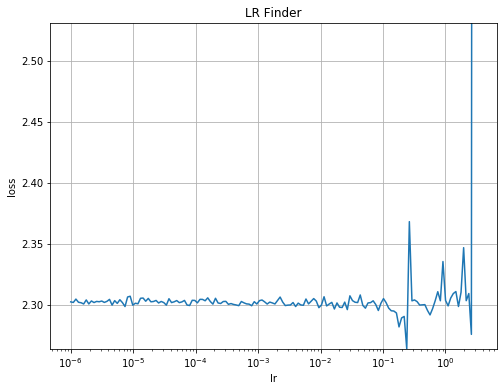

In [7]:
from altusi.models import AlexNet
from altusi.models import VGG11, VGG13, VGG16, VGG19
from altusi.models import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from altusi.models import DenseNet121, DenseNet161, DenseNet169, DenseNet201
from altusi.models import GoogleNet, InceptionV3


# AlexNet architecture
# net = AlexNet(nclasses=cfg.CIFAR_NCLASSES); model_name = 'AlexNet'

# VGG architectures
# net = VGG11(nclasses=cfg.CIFAR_NCLASSES); model_name = 'VGG11'
# net = VGG13(nclasses=cfg.CIFAR_NCLASSES); model_name = 'VGG13'
# net = VGG16(nclasses=cfg.CIFAR_NCLASSES); model_name = 'VGG16'
# net = VGG19(nclasses=cfg.CIFAR_NCLASSES); model_name = 'VGG19'

# ResNet architectures
# net = ResNet18(nclasses=cfg.CIFAR_NCLASSES); model_name = 'ResNet18'
# net = ResNet34(nclasses=cfg.CIFAR_NCLASSES); model_name = 'ResNet34'
# net = ResNet50(nclasses=cfg.CIFAR_NCLASSES); model_name = 'ResNet50'
# net = ResNet101(nclasses=cfg.CIFAR_NCLASSES); model_name = 'ResNet101'
# net = ResNet152(nclasses=cfg.CIFAR_NCLASSES); model_name = 'ResNet152'

# DenseNet architectures
# net = DenseNet121(nclasses=cfg.CIFAR_NCLASSES); model_name = 'DenseNet121'
# net = DenseNet161(nclasses=cfg.CIFAR_NCLASSES); model_name = 'DenseNet161'
# net = DenseNet169(nclasses=cfg.CIFAR_NCLASSES); model_name = 'DenseNet169'
# net = DenseNet201(nclasses=cfg.CIFAR_NCLASSES); model_name = 'DenseNet201'


# Inception architecture
net = GoogleNet(nclasses=cfg.CIFAR_NCLASSES); model_name = 'GoogleNet'
# net = InceptionV3(nclasses=cfg.CIFAR_NCLASSES); model_name = 'InceptionV3'

learner = Learner(net, train_loader, ctx)
lr_finder = LRFinder(learner)

lr_finder.find(lr_start=1e-6)
lr_finder.plot()